<a href="https://colab.research.google.com/github/ugrasegehan/IE423/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

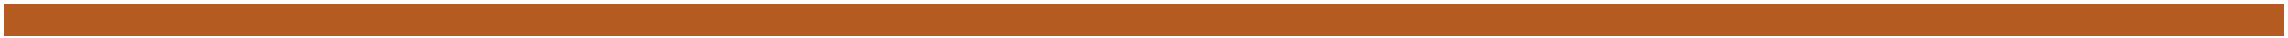

## <font color='#475468'> Football Players Value Prediction:</font>
### <font color='#475468'> Can you predict value of football players in major leagues with their current performances?</font>

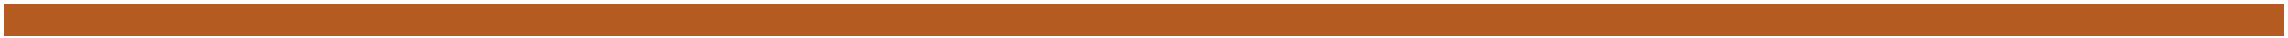

## Initialize

In [1]:
import pandas as pd
import numpy as np

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfFootballPlayers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/task1/final_data.csv')


In [5]:
dfFootballPlayers.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## Select Data

### Selecting prediction "Target"
The column we want to predict is called the prediction **target**. By convention, the prediction target is called y. In our case, we want to predict Current Value of a football players so we are choosing it as "y".

In [7]:
y = dfFootballPlayers.loc[:,['current_value']]

### Choose "Features"
Hence player column, name and team name are not important for players' value (whereas I believe team name is also important), I will use features from 4th column and will drop the current value because it was already chosen as our target.

In [53]:
#X = dfFootballPlayers.loc[:,['highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals', 'position_encoded']]
X = dfFootballPlayers.iloc[:,4:22].drop(['current_value'], axis=1)

In [38]:
# Now viewing top few rows to understand type of data and numerical values etc.
X.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,70000000,1,0
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,22000000,1,0
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,6000000,1,0
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,2,0
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,80000000,2,0


In [39]:
# Now describing data to see whether any anomaly exists in dataset
X.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,2.000000e+08,4.000000,1.000000


## Build Model

Defining the model


In [40]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

# It is offered to fix the seed random number but hence seen random state 1 in class, wanted to try something so and used another random state in Football Players' case
mdlDtrFootballPlayers = DecisionTreeRegressor(random_state=1)

Fitting the model to our dataset about players

In [41]:
mdlDtrFootballPlayers.fit(X,y)

DecisionTreeRegressor(random_state=1)

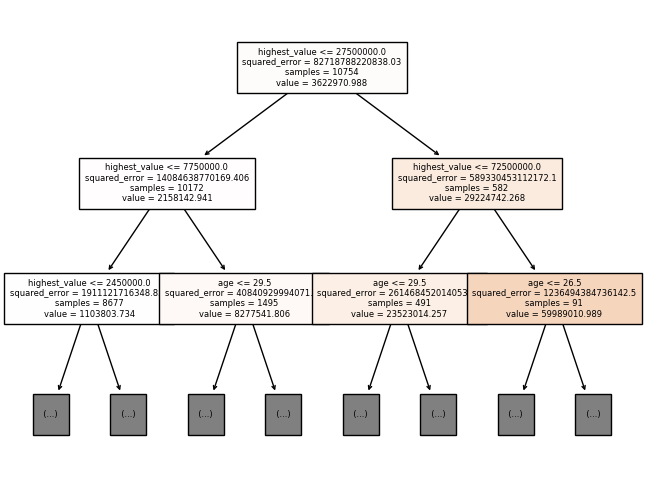

In [42]:
# Let's see the model in a decision tree format

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrFootballPlayers, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

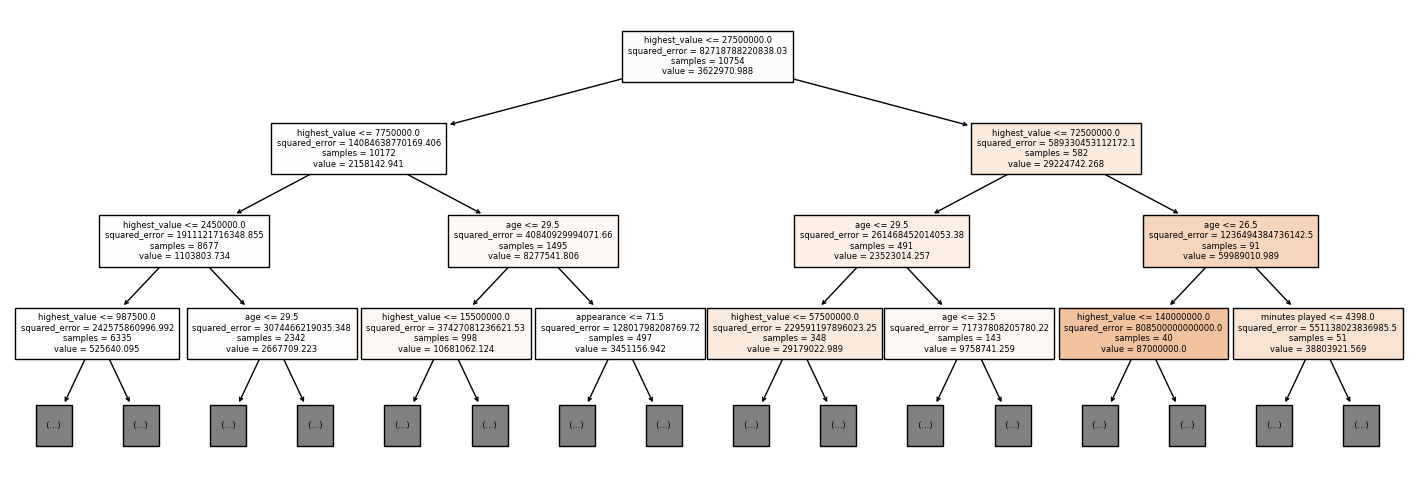

In [43]:
# Let's see one more step by changing depth of the model

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6), dpi=100)
plot_tree(mdlDtrFootballPlayers, max_depth=3, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

# Can keep increasing depth of the model to see more detailed tree and make a more stricted choose among many players

We now have a fitted model that we can use it to make value predictions of each player.


#### Predicting values

In [44]:
print('First players:')
print(X.head())
print('Value predictions:')
print(mdlDtrFootballPlayers.predict(X.head()))

First players:
   height   age  appearance     goals   assists  yellow cards  \
0   189.0  32.0         104  0.000000  0.000000      0.009585   
1   196.0  30.0          15  0.000000  0.000000      0.069018   
2   188.0  37.0           4  0.000000  0.000000      0.000000   
3   175.0  25.0          82  0.028090  0.056180      0.224719   
4   191.0  30.0          63  0.017889  0.017889      0.053667   

   second yellow cards  red cards  goals conceded  clean sheets  \
0                  0.0        0.0        1.217252      0.335463   
1                  0.0        0.0        1.242331      0.207055   
2                  0.0        0.0        0.616438      0.924658   
3                  0.0        0.0        0.000000      0.000000   
4                  0.0        0.0        0.000000      0.000000   

   minutes played  days_injured  games_injured  award  highest_value  \
0            9390            42              5     13       70000000   
1            1304           510             58 

In [45]:
y.head()

,current_value
0,15000000
1,1500000
2,600000
3,50000000
4,40000000


Evaluating the model as accuracy with some methods

First one is Mean Absolute Error or MAE as known

In [46]:
from sklearn.metrics import mean_absolute_error

y_pred = mdlDtrFootballPlayers.predict(X)
print('Mean Absolute Erorr is:')
print(mean_absolute_error(y,y_pred))

Mean Absolute Erorr is:
2.3247163846010785


Now we are splitting data into two sets as training and testing as done in class and lecture notes to ensure that our model will be reflecting a more realistic model which makes it's future predictions according to data from history. Test set will help us to valide the model that was set before.



In [47]:
from sklearn.model_selection import train_test_split

# Splitting features we have into train and tes splits, to be consistent I am using same random state with previos steps
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=19)

In [48]:
# Rebuilding the model with same random state
mdlDtrFootballPlayersRBLD = DecisionTreeRegressor(random_state=19)
mdlDtrFootballPlayersRBLD .fit(X_train, y_train)

# Predicting test data
y_test_pred = mdlDtrFootballPlayersRBLD .predict(X_test)

# Evaluate test data actual vs prediction
print('Mean Absoulute Error when splitted dataset to train and test :')
print(mean_absolute_error(y_test,y_test_pred))

Mean Absoulute Error when splitted dataset to train and test :
1270327.7545327754


Mean Absolute Error has increased, actually I had expected a different result.

utexas_ds_orie_divider_gray.png

## Improve Decision Tree Model


In [49]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mdlDtrFootballPlayersIDT = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrFootballPlayersIDT.fit(X_trn,y_trn)
    y_tst_prd = mdlDtrFootballPlayersIDT.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

In [50]:
# Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 50, 500, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  2367329.1153078033
Max leaf nodes:  50 	 Mean Absolute Error:  1345188.9720605523
Max leaf nodes:  500 	 Mean Absolute Error:  1248676.0752890548
Max leaf nodes:  50000 	 Mean Absolute Error:  1271106.4621106463


The best depth of the tree is at 500 max leaf nodes.

## Build Ensemble Random Forest Model
While the Decision Tree is simple, it is also not the most accurate because only a single tree is created and all future data points have to traverse the same tree.  So in Ensemble Random Forest Model we will be generating more data trees to make a prediction by averaging of their own predictions which generally gives a better accuracy than a single tree.

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Define random forest model
mdlRfsFootballPlayers = RandomForestRegressor(random_state=19)

# Fit model
mdlRfsFootballPlayers.fit(X_train, y_train)

# Predict
y_test_pred = mdlRfsFootballPlayers.predict(X_test)

# Evaluate
print('Mean Absolute Error of Random Forest Model):')
print(mean_absolute_error(y_test,y_test_pred))

<ipython-input-51-10e94ded139c>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdlRfsFootballPlayers.fit(X_train, y_train)


Mean Absolute Error of Random Forest Model):
942859.7125368046


The Random Forest Model has decreased the Mean Absolute Error to **942859** from **1248676**, we have observed that it reduces the MAE so a better predictive in terms of accuracy.

utexas_ds_orie_divider_gray.png